# **Deep Learning Project - House Price Prediction**

## **Project Purpose:**

The purpose of the Python script is to develop a neural network model for predicting house prices. The script follows these main steps:

- Data preprocessing: The script reads a housing dataset from a CSV file and performs necessary data preprocessing steps. This includes handling missing values, one-hot encoding categorical variables, and splitting the data into training and testing sets.


- Model construction: The script defines a sequential neural network model using the Keras library. The model consists of several dense layers with varying numbers of units and activation functions.


- Model compilation: The script compiles the model by specifying the optimizer, loss function, and metrics to be used during training.


- Model training: The script trains the model using the training data. It uses the fit() function and includes an early stopping callback to prevent overfitting. The training progress is monitored, and the best weights are restored based on the validation loss.


- Model evaluation: The script evaluates the trained model on the testing data. It uses the predict() function to generate predictions for house prices. A subset of the predicted and true values is plotted to visualize the model's performance.

The overall purpose of the script is to create and train a neural network model that can accurately predict house prices based on given features. The script aims to provide insights into the model's training history, such as the loss and metric values over epochs, and visualize the model's predictions compared to the true values for a subset of the testing data.

The libraries used in the Python script:

- pandas: Used for data manipulation and analysis.
- numpy: Used for numerical operations and array manipulation.
- matplotlib.pyplot: Used for data visualization and creating plots.
- sklearn.preprocessing.MinMaxScaler: Used for feature scaling.
- sklearn.model_selection.train_test_split: Used for splitting data into training and testing sets.
- keras.models.Sequential: Used for creating a sequential neural network model.
- keras.layers.Dense: Used for adding dense layers to the neural network model.
- keras.callbacks.EarlyStopping: Used for early stopping during model training.
- keras.callbacks.History: Used for tracking the training history of the model.

These libraries are commonly used in machine learning and deep learning tasks for data manipulation, preprocessing, model construction, and evaluation.

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import MinMaxScaler  # For data preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

from keras.models import Sequential  # For creating a sequential neural network model
from keras.layers import Dense  # For adding layers to the neural network
from keras.callbacks import EarlyStopping, History  # For early stopping during model training and tracking training history

In [5]:
df = pd.read_csv(r'D:\My Files\Courses\Python\80_ANN\12_HousePrediction\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Drop rows with missing values (NaN) from the DataFrame
df = df.dropna(axis=0)

# Perform one-hot encoding on the "ocean_proximity" column using pandas get_dummies function
df = pd.get_dummies(df, columns=["ocean_proximity"])

# Display the first few rows of the modified DataFrame with one-hot encoded columns
df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [17]:
# Create the feature matrix by dropping the target variable ("median_house_value") from the DataFrame
X = df.drop("median_house_value", axis=1)

# Create the target variable array
y = df["median_house_value"]

# Split the data into training and testing sets using the train_test_split function
# with a test size of 0.2 (20% of the data will be used for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of the MinMaxScaler for feature scaling
scaler = MinMaxScaler()

# Scale the feature matrix of the training set using the fit_transform method of the scaler
X_train = scaler.fit_transform(X_train)

# Scale the feature matrix of the testing set using the transform method of the scaler
X_test = scaler.transform(X_test)


In [32]:
# Print the shape of the feature matrix X and the target variable array y
print(X.shape, y.shape)

# Find the unique values in the feature matrix X_train using the np.unique function
np.unique(X_train)


(20433, 13) (20433,)


array([0.00000000e+00, 8.40830741e-05, 1.40138457e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [41]:
# Create a sequential model
model = Sequential()

# Add a dense layer with 1000 units, using the input shape of X_train, and ReLU activation
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))

# Add a dense layer with 500 units and ReLU activation
model.add(Dense(500, activation='relu'))

# Add a dense layer with 250 units and ReLU activation
model.add(Dense(250, activation='relu'))

# Add a dense layer with 1 unit and linear activation (output layer)
model.add(Dense(1, activation='linear'))

# Print a summary of the model's architecture
model.summary()

# Compile the model with the Adam optimizer, mean squared error loss, and mean absolute error metric
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])

# Create an early stopping callback to monitor the validation loss, with a minimum mode and a patience of 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, restore_best_weights=True)

# Fit the model to the training data, using the validation data for evaluation,
# and including the early stopping callback. Train for 100 epochs with a batch size of 20 and verbose mode
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[stop], epochs=100, batch_size=20, verbose=1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              14000     
_________________________________________________________________
dense_18 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_19 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 251       
Total params: 640,001
Trainable params: 640,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
818/818 [==============================] - 3s 4ms/step - loss: 13585052672.0000 - mae: 85368.3906 - val_loss: 6225453568.0000 - val_mae: 59659.7734
Epoch 2/100
818/818 [==============================] - 3s 4ms/step - loss: 5485738496.

In [54]:
history=hisrotry.history
history

{'loss': [13585052672.0,
  5485738496.0,
  5087309312.0,
  4973053440.0,
  4869794816.0,
  4768186368.0,
  4698331136.0,
  4596295168.0,
  4555927040.0,
  4481234432.0,
  4447976960.0,
  4413042176.0,
  4394037248.0,
  4367951872.0,
  4355983360.0,
  4325338624.0,
  4310967808.0,
  4283015168.0,
  4284663552.0,
  4261259520.0,
  4242938880.0,
  4238907136.0,
  4211453440.0,
  4208781312.0,
  4183585792.0,
  4172548096.0,
  4152505088.0,
  4125805568.0,
  4128582912.0,
  4111508736.0,
  4067636480.0,
  4059852544.0,
  4043018752.0,
  4024729600.0,
  4030449920.0,
  3987756288.0,
  3979406848.0,
  3966726912.0,
  3954764800.0,
  3925903616.0,
  3909803776.0,
  3894031872.0,
  3866817536.0,
  3841310464.0,
  3815629312.0,
  3789539328.0,
  3772984320.0,
  3731710976.0,
  3683224576.0,
  3632323584.0,
  3601264384.0,
  3559692288.0,
  3516572928.0,
  3479568896.0,
  3443357184.0,
  3397614080.0,
  3389670144.0,
  3340078080.0,
  3352831488.0,
  3312703232.0,
  3304791552.0,
  3316833792.0,

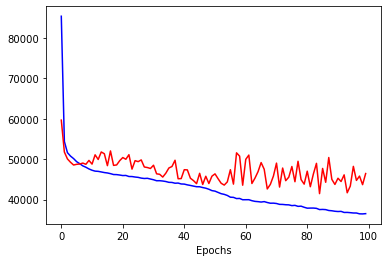

In [59]:
# Extract the Mean Absolute Error (MAE) values from the training history
mae = history["mae"]

# Extract the validation MAE values from the training history
val_mae = history["val_mae"]

# Plot the training MAE values in blue
plt.plot(mae, label="mae", color="blue")

# Plot the validation MAE values in red
plt.plot(val_mae, label="val_mae", color="red")

# Set the label for the x-axis
plt.xlabel("Epochs")

# Display the plot
plt.show()


This plot shows the Mean Absolute Error (MAE) values during the training process. MAE represents the average absolute difference between the predicted and true values. It is a measure of how well the model predicts house prices.

**Analysis:**

- Convergence: The plot allows us to observe the convergence of the model during training. If the training and validation MAE values decrease and stabilize over epochs, it indicates that the model is learning and improving its predictions.
- Overfitting or Underfitting: If the training MAE continues to decrease, while the validation MAE starts to increase or stagnate, it suggests overfitting. This means the model is fitting the training data too closely and may not generalize well to unseen data. On the other hand, if both the training and validation MAE are high and show little improvement, it may indicate underfitting, where the model is not capturing the underlying patterns in the data.
- Early Stopping: The early stopping callback, indicated by the stabilization or slight increase in the validation MAE, helps prevent overfitting by stopping the training when the model's performance on the validation data starts to deteriorate. This is reflected in the plot if the validation MAE stops decreasing or starts to plateau.

By analyzing the training and validation MAE values, we can gain insights into the model's performance, identify potential overfitting or underfitting, and determine the appropriate number of epochs for training the model.

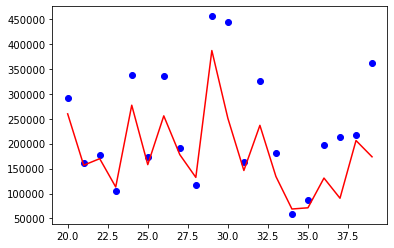

In [63]:
# Assign the true values of the target variable from the test set to yTrue
yTrue = y_test

# Predict the target variable values using the trained model on the test set features
yPredict = model.predict(X_test)

# Create an array for the x-axis values
xAxis = np.linspace(0, len(X_test), len(X_test))

# Set the start and end indices for displaying a subset of the data
p = 20
n = 40

# Plot the predicted values in red
plt.plot(xAxis[p:n], yPredict[p:n], color="red")

# Scatter plot the true values in blue
plt.scatter(xAxis[p:n], yTrue[p:n], color="blue")

# Display the plot
plt.show()

This plot compares the predicted house prices with the true house prices from a subset of the testing data. It helps visualize how well the model's predictions align with the actual values.

**Analysis:**

- Prediction Accuracy: By comparing the predicted values (in red) with the true values (in blue), we can assess the accuracy of the model's predictions. If the predicted values closely follow the true values, it indicates that the model is making accurate predictions.
- Deviation: The plot allows us to observe the deviation between the predicted and true values. If the points are clustered closely around a diagonal line, it suggests that the model's predictions are close to the true values. However, if there is a larger spread or significant deviations from the diagonal line, it indicates that the model's predictions may not align well with the true values.

By analyzing the scatter plot, we can gain insights into the model's ability to predict house prices accurately. It helps identify any systematic biases or significant deviations in the predictions and provides a visual representation of the model's performance on a subset of the testing data.

## **Conclusion:**

The Python script demonstrates the process of building and training a neural network model for house price prediction using the Keras library. The script performs data preprocessing, model construction, compilation, training, and evaluation. It also includes visualizations of the model's performance.

### **Insight -  House Price Prediction:**

1. Neural network model architecture: The model architecture consists of several dense layers with varying numbers of units and activation functions. This allows the model to learn complex relationships between the input features and the target variable (house prices).


2. Data preprocessing: The script performs necessary data preprocessing steps such as handling missing values, one-hot encoding categorical variables, and scaling the features using MinMaxScaler. These preprocessing steps help in preparing the data for the neural network model.


3. Training and evaluation: The model is trained using the training data and evaluated using the testing data. The model is compiled with the Adam optimizer and the mean squared error (MSE) loss function. The metric used for evaluation is mean absolute error (MAE). The early stopping callback is used to prevent overfitting by monitoring the validation loss.


4. Training history: The training history of the model is stored, which includes information about the loss and MAE values at each epoch. This history can be used to analyze the model's performance over time and make decisions regarding model training.


5. Performance visualization: The script includes visualizations to analyze the model's performance. The plot of training and validation MAE values over epochs provides insights into the model's convergence and potential overfitting or underfitting. The scatter plot of predicted and true values for a subset of the testing data helps visualize how well the model predicts house prices.


6. Further analysis: Additional analysis can be performed on the model's performance, such as calculating additional evaluation metrics (e.g., RMSE, R-squared) or exploring feature importance. This can provide further insights into the accuracy and reliability of the model's predictions.

These insights help understand the process and results of the house price prediction using a neural network model. They can be used to assess the model's performance, make improvements if necessary, and gain valuable insights into the factors influencing house prices.